y = wx

In [13]:
import numpy as np
import matplotlib.pyplot as plt
# 가중치(weigt)
w = 3 # 찾고자 하는 가중치

In [14]:
# × 데이터
x = np. random. rand(20)
x

array([0.32953128, 0.22239233, 0.64818941, 0.5087424 , 0.74123926,
       0.30914735, 0.09124347, 0.27781794, 0.44567981, 0.61622471,
       0.63644004, 0.42310103, 0.00718385, 0.71207766, 0.48950399,
       0.30359619, 0.04507203, 0.32892062, 0.85080319, 0.03997085])

In [15]:
# y 데이터 (noise 포함)
noise = np.random. uniform(-2, 2, 20) #-2에서 +2 사이의 균등 분포 노이즈
y_true = w * x + noise
y_true

array([ 2.85621976, -0.36254838,  2.20223981, -0.09042928,  1.41755365,
        0.075914  ,  0.87430659,  0.22361433,  2.56725003,  0.00558689,
        2.86903648,  1.57498596, -1.84498539,  0.73480008,  0.6818079 ,
        1.75413793, -0.52074372,  0.52812077,  0.93237102, -1.59826535])

In [16]:
# 초기 가중치 w_pred
w_pred = 0.1
w_pred

0.1

In [17]:
# 예측값
y_pred = w_pred * x
y_pred

array([0.03295313, 0.02223923, 0.06481894, 0.05087424, 0.07412393,
       0.03091474, 0.00912435, 0.02778179, 0.04456798, 0.06162247,
       0.063644  , 0.0423101 , 0.00071839, 0.07120777, 0.0489504 ,
       0.03035962, 0.0045072 , 0.03289206, 0.08508032, 0.00399708])

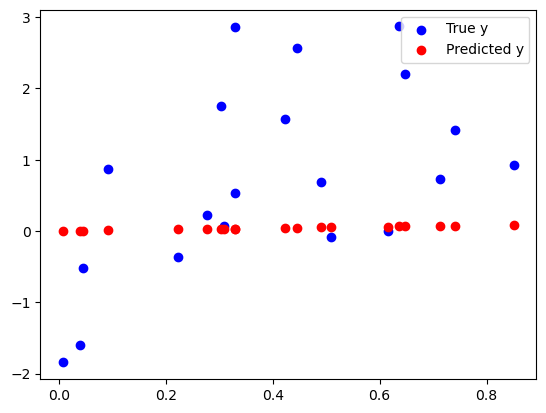

In [18]:
# 그래프
plt.scatter(x, y_true, color='blue', label='True y') 
plt.scatter(x, y_pred, color='red', label='Predicted y')
plt.legend()
plt.show()

## Gradient Descent

## Mnist Dataset

In [19]:
from tensorflow.keras.datasets import mnist

# flatten 해주는 전처리 -> model에서 flatten하면 됨
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [21]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

Metal device set to: Apple M2


2024-05-16 11:57:16.070921: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-16 11:57:16.071446: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [22]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [23]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5


2024-05-16 12:23:41.514381: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-05-16 12:23:41.859646: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


469/469 [==============================] - 6s 8ms/step - loss: 0.2584 - accuracy: 0.9250
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1040 - accuracy: 0.9689
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0686 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0496 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0374 - accuracy: 0.9888


In [24]:
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.98


## 텐서플로와 케라스 API를 통해 핵심 객체와 클래스를 실습합니다.
    - 텐서플로의 텐서, 변수, 텐서연산, 그래디언트 테이프 객체를 실습합니다.
        - 상수텐서와 변수텐서를 만들고 연산해봅니다.
        
        - 그래디언트 테이프를 통해 그래디언트를 계산해봅니다.
        - 텐서플로 선형 분류기 실습을 통해 위 내용을 한번 더 실습합니다.

### 1. 텐서플로 텐서와 변수 생성
먼저, 상수 텐서와 변수 텐서를 생성하고, 이를 연산해봅니다.

In [25]:
import tensorflow as tf

# 상수 텐서 생성
const_tensor = tf.constant([[1.0, 2.0], [3.0, 4.0]], dtype=tf.float32)
print("상수 텐서:\n", const_tensor)

# 변수 텐서 생성
var_tensor = tf.Variable([[1.0, 2.0], [3.0, 4.0]], dtype=tf.float32)
print("변수 텐서:\n", var_tensor)

# 텐서 연산
result = const_tensor + var_tensor
print("연산 결과:\n", result)

상수 텐서:
 tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)
변수 텐서:
 <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float32)>
연산 결과:
 tf.Tensor(
[[2. 4.]
 [6. 8.]], shape=(2, 2), dtype=float32)


### 2. 그래디언트 테이프를 사용한 그래디언트 계산
TensorFlow의 `tf.GradientTape`를 사용하여 자동 미분을 수행합니다.

In [26]:
# 그래디언트 테이프를 사용하여 그래디언트를 계산
with tf.GradientTape() as tape:
    tape.watch(var_tensor)
    z = tf.reduce_sum(var_tensor ** 2)

# 각 변수에 대한 그래디언트를 계산
grads = tape.gradient(z, var_tensor)
print("그래디언트:\n", grads)

그래디언트:
 tf.Tensor(
[[2. 4.]
 [6. 8.]], shape=(2, 2), dtype=float32)


In [27]:
# 그래디언트 테이프를 사용하여 그래디언트를 계산
with tf.GradientTape() as tape:
    tape.watch(var_tensor)
    z = tf.reduce_sum(var_tensor ** 2)

# 각 변수에 대한 그래디언트를 계산
grads = tape.gradient(z, var_tensor)
print("그래디언트:\n", grads)

그래디언트:
 tf.Tensor(
[[2. 4.]
 [6. 8.]], shape=(2, 2), dtype=float32)


### 3. 텐서플로 선형 분류기 실습
간단한 선형 분류기를 구축하여 그래디언트 계산 및 매개변수 업데이트를 실습합니다.

In [29]:
import numpy as np

# 데이터셋 생성 (간단한 이진 분류 문제)
X = np.array([[0., 0.], [1., 0.], [0., 1.], [1., 1.]], dtype=np.float32)
y = np.array([[0.], [1.], [1.], [0.]], dtype=np.float32)

# 모델 파라미터 초기화
W = tf.Variable(tf.random.normal([2, 1]), dtype=tf.float32)
b = tf.Variable(tf.zeros([1]), dtype=tf.float32)

# 학습율 설정
learning_rate = 0.1

# 손실 함수 정의 (Mean Squared Error)
def loss_fn(X, y):
    logits = tf.matmul(X, W) + b
    loss = tf.reduce_mean((logits - y) ** 2)
    return loss

# 그래디언트 계산 및 경사 하강법 업데이트
for step in range(100):
    with tf.GradientTape() as tape:
        loss = loss_fn(X, y)
    dW, db = tape.gradient(loss, [W, b])

    # 경사 하강법을 통해 파라미터 업데이트
    W.assign_sub(learning_rate * dW)
    b.assign_sub(learning_rate * db)

    # 학습 과정 출력
    if (step + 1) % 10 == 0:
        print(f"스텝 {step+1}, 손실: {loss.numpy()}")

# 최종 모델 파라미터 출력
print("학습된 W:\n", W.numpy())
print("학습된 b:\n", b.numpy())

스텝 10, 손실: 0.27777841687202454
스텝 20, 손실: 0.264112263917923
스텝 30, 손실: 0.25726768374443054
스텝 40, 손실: 0.2537725269794464
스텝 50, 손실: 0.25196921825408936
스텝 60, 손실: 0.25103187561035156
스텝 70, 손실: 0.25054216384887695
스텝 80, 손실: 0.25028538703918457
스텝 90, 손실: 0.2501504123210907
스텝 100, 손실: 0.25007933378219604
학습된 W:
 [[0.01251938]
 [0.01103524]]
학습된 b:
 [0.48603043]


### 실습

#### 상수텐서와 변수텐서를 만들고 연산해봅니다.

상수텐서 생성

In [ ]:
input_const = tf.constant(3.)

In [ ]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

In [46]:
a

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [47]:
b

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [48]:
c

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [49]:
d

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [50]:
e

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[4., 4.],
       [4., 4.]], dtype=float32)>

In [51]:
e

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[4., 4.],
       [4., 4.]], dtype=float32)>

Both are tf.Tensors(). The difference is that:

tf.ones() creates a tensor with all values equal to 1. For example, tf.ones((2, 2)) has as output:

```python
<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>
```

By the other hand, tf.constant() creates a tensor with the values you want. For example, tf.constant([[1, 2], [3, 4]]) creates:
```
<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]])>
```
You can also change their types (with param dtype).

Both are equal in terms of doing same operations, because they are tensors.

변수텐서

In [52]:
x = tf.Variable(tf.random.uniform((2, 2)))
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [56]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
gradient 

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

In [57]:
#Using GradientTape with constant tensor inputs

# 상수 텐서
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    # 상수 텐서의 경우 tape.watch()를 호출하여 추적한다는 것을 수동으로 알려주어야 함
   tape.watch(input_const)  
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

#### 그래디언트 테이프를 통해 그래디언트를 계산해봅니다.

In [58]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

In [59]:
acceleration

<tf.Tensor: shape=(), dtype=float32, numpy=9.8>

#### 텐서플로 선형 분류기 실습을 통해 위 내용을 한번 더 실습합니다.

- 2D 평면에 두 클래스의 랜덤한 포인트 생성하기
- 두 클래스를 (2000, 2) 크의 한 배열로 쌓기
- (0과 1로 구성된) 타깃 생성하기
- 두 클래스의 포인트를 그래프로 그리기
- 선형 분류기의 변수 만들기

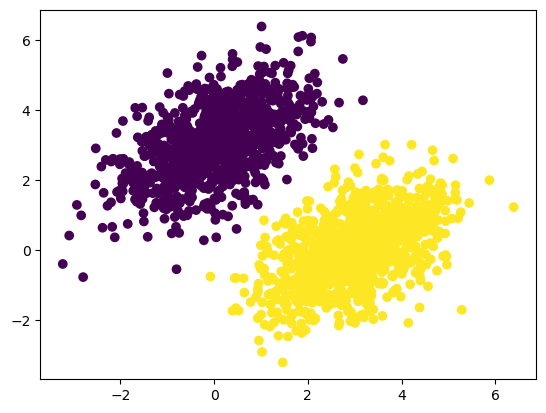

In [60]:
# 2D 평면에 두 클래스의 랜덤한 포인트 생성하기
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

# 두 클래스를 (2000, 2) 크기의 한 배열로 쌓기
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

# (0과 1로 구성된) 타깃 생성하기
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))
# 두 클래스의 포인트를 그래프로 그리기
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [61]:
# 선형 분류기의 변수 만들기
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

# 정방향 패스 함수
def model(inputs):
    return tf.matmul(inputs, W) + b

# 평균 제곱 오차 손실 함수 (mse)
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

# 훈련 스텝 함수
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

# 배치 훈련 루프
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 4.2708
Loss at step 1: 0.5071
Loss at step 2: 0.1737
Loss at step 3: 0.1213
Loss at step 4: 0.1076
Loss at step 5: 0.0996
Loss at step 6: 0.0930
Loss at step 7: 0.0871
Loss at step 8: 0.0817
Loss at step 9: 0.0767
Loss at step 10: 0.0722
Loss at step 11: 0.0680
Loss at step 12: 0.0643
Loss at step 13: 0.0608
Loss at step 14: 0.0577
Loss at step 15: 0.0548
Loss at step 16: 0.0522
Loss at step 17: 0.0498
Loss at step 18: 0.0476
Loss at step 19: 0.0456
Loss at step 20: 0.0437
Loss at step 21: 0.0421
Loss at step 22: 0.0405
Loss at step 23: 0.0391
Loss at step 24: 0.0379
Loss at step 25: 0.0367
Loss at step 26: 0.0356
Loss at step 27: 0.0347
Loss at step 28: 0.0338
Loss at step 29: 0.0330
Loss at step 30: 0.0322
Loss at step 31: 0.0316
Loss at step 32: 0.0310
Loss at step 33: 0.0304
Loss at step 34: 0.0299
Loss at step 35: 0.0294
Loss at step 36: 0.0290
Loss at step 37: 0.0286
Loss at step 38: 0.0282
Loss at step 39: 0.0279


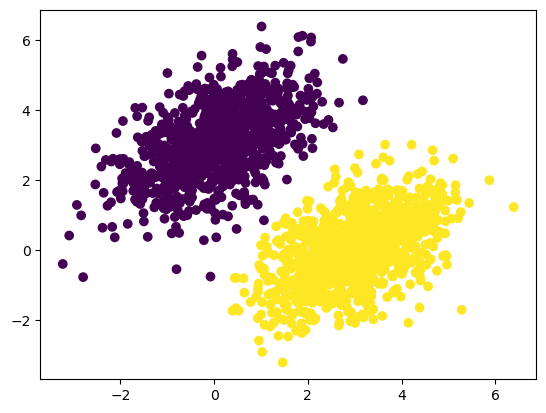

In [63]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

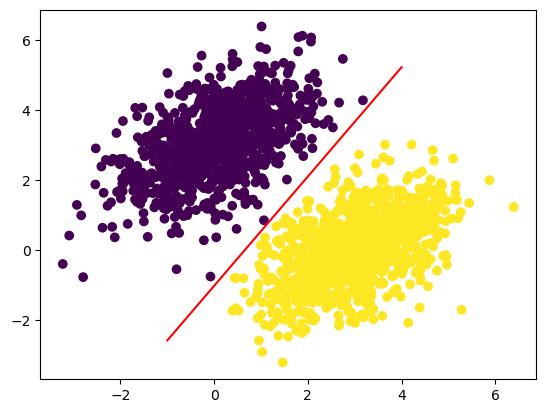

In [65]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

In [ ]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):
	def __init__(self, units, activation=None):
		super().__init__()
		self.units = units
        self.activation = activation
    
    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer='random_normal')
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='zeros')
    
    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

### Optimizers
| **이름**        | **특징**                                          | **인자명**  |
|-----------------|--------------------------------------------------|-------------|
| SGD             | Stochastic Gradient Descent: batch 단위로 loss 계산 후 weight 갱신                     | 'sgd'       |
| Adam            | Adaptive Moment Estimation: 모멘텀과 학습률을 적응적으로 조절, 빠른 수렴                    | 'adam'      |
| RMSprop         | Root Mean Square Propagation: 변화가 큰 학습률을 감소시켜 안정적인 학습 유도              | 'rmsprop'   |
| Adagrad         | Adaptive Gradient Algorithm: 각 매개변수마다 적응적으로 학습률을 조정해드림, 과적합 완화    | 'adagrad'   |

### Losses
| **이름**              | **특징**                                                    | **인자명**           |
|-----------------------|------------------------------------------------------------|----------------------|
| Mean Squared Error    | 평균 제곱 오차: 회귀문제에 주로 사용, 예측값과 실제값의 차이를 제곱하여 평균               | 'mean_squared_error' |
| Binary Crossentropy   | 이진 분류의 로지스틱 손실 함수: 이진 분류 문제에 적합함                              | 'binary_crossentropy'|
| Categorical Crossentropy | 다중 클래스 분류의 로지스틱 손실 함수: 원-핫 인코딩된 레이블 사용                     | 'categorical_crossentropy' |
| Sparse Categorical Crossentropy | 다중 클래스 분류의 로지스틱 손실 함수: 인덱스들로 인코딩된 레이블 사용             | 'sparse_categorical_crossentropy' |

### Metrics
| **이름**              | **특징**                                                      | **인자명**   |
|-----------------------|--------------------------------------------------------------|--------------|
| Accuracy              | 정확도: 전체 샘플 중 맞게 분류된 샘플의 비율, 이진 및 다중 클래스 분류 문제에 사용         | 'accuracy'   |
| Precision             | 정밀도: 양성이라 예측한 샘플 중 실제 양성의 비율                                | 'precision'  |
| Recall                | 재현율: 실제 양성 샘플 중 양성이라 예측된 샘플의 비율                            | 'recall'     |
| AUC                   | Area Under the ROC Curve: ROC 곡선 하단의 면적, 모델 성능의 균형성을 나타냄        | 'AUC'        |

이와 같이 Keras는 다양한 옵티마이저, 손실 함수, 평가 지표를 제공하여, 다양한 딥러닝 모델의 학습과 평가에 활용할 수 있습니다. 이러한 기능을 통해 사용자는 모델의 성능을 최적화하고, 다양한 문제에 대해 적합한 학습 전략을 적용할 수 있습니다.


Sigmoid 함수의 출력이 0.5를 중심으로 하는 것이 비효율적인 주된 이유는 다음과 같이 역전파 과정에서 특정 문제를 유발할 수 있기 때문입니다:

### 1. **출력 중심이 0이 아님**
- **설명:** Sigmoid 함수의 출력을 보면, 모든 출력 값은 (0, 1) 범위 내에 있으며 중심 값은 0.5입니다. 이는 데이터의 다루기 용이성을 떨어뜨릴 수 있습니다. 특히, 가중치 업데이트와 관련하여 다음과 같은 문제가 발생할 수 있습니다:
  - **바이어스 (Bias) 영향 증가**: 출력 값들의 중심이 0이 아니기 때문에, 특히 Sigmoid 함수의 출력 범위에서 벗어나는 값을 처리할 때 바이어스 항목에 대한 민감도가 커집니다. 이는 역전파 과정에서 가중치 업데이트에 있어 비효율성을 초래할 수 있습니다.

### 2. **비효율적인 가중치 업데이트**
- **설명:** 역전파 과정에서는 각 층의 가중치를 업데이트하기 위해 기울기(gradient)가 사용됩니다. Sigmoid 함수의 출력이 0을 중심으로 하지 않는 것은 가중치 업데이트의 방향 및 크기에 영향을 미칠 수 있습니다.
  - **역전파 계산**: 각 뉴런의 출력이 0.5를 중심으로 할 경우, 출력이 0보다 크기 때문에 가중치 갱신 시 ±0의 균형을 유지하기 어렵습니다. 이는 가중치가 한 쪽 방향으로 치우치는 결과를 초래할 수 있습니다.
- **신호 전달 문제**: Sigmoid 함수는 종속적인 비선형 특성 때문에 역전파 시 기울기 소실 문제가 발생하기 쉽습니다. 이는 깊은 층이 있는 신경망에서 가중치가 한 방향으로 집중되거나 특정한 입력 값에 민감하게 반응하지 못하게 할 수 있습니다.

### 3. **출력 값의 범위 제한**
- **설명:** Sigmoid의 출력 값이 (0, 1) 범위로 제한되므로, 출력 값이 0에 가까운 경우 또는 1에 가까운 경우 도함수의 값이 매우 작아지게 됩니다.
  - **기울기 소실 문제**: 이는 기울기 소실 문제를 유발하며, 특히 깊은 신경망에서는 관찰하지 못한 높은 층에서의 가중치 갱신이 어려워질 수 있습니다.

### 대안으로 사용되는 활성화 함수
**ReLU (Rectified Linear Unit)**와 같은 활성화 함수는 출력이 0을 중심으로 하지만 주로 양의 값을 가지게 설계되었습니다. 이는 역전파 과정에서 가중치 업데이트의 효율성을 높입니다. ReLU의 출력은 다음과 같습니다:

```plaintext
ReLU(x) = x if x > 0 else 0
```

### ReLU의 장점
1. **0을 중심으로 하는 출력**: ReLU 함수는 음의 값에 대해서는 0을 반환하고, 양의 값에 대해서는 입력 값 그대로 반환합니다. 이는 역전파 과정에서 가중치 갱신이 양 방향으로 잘 이루어지게 만듭니다.
2. **기울기 소실 문제 감소**: ReLU는 기울기 소실 문제를 줄이는 데 효과적입니다. 이는 특히 깊은 신경망에서 중요한 장점입니다.
3. **단순하고 빠른 계산**: ReLU는 계산이 단순하고 빠르며, 활성화 함수를 사용하는 네트워크에서 흔히 사용됩니다.


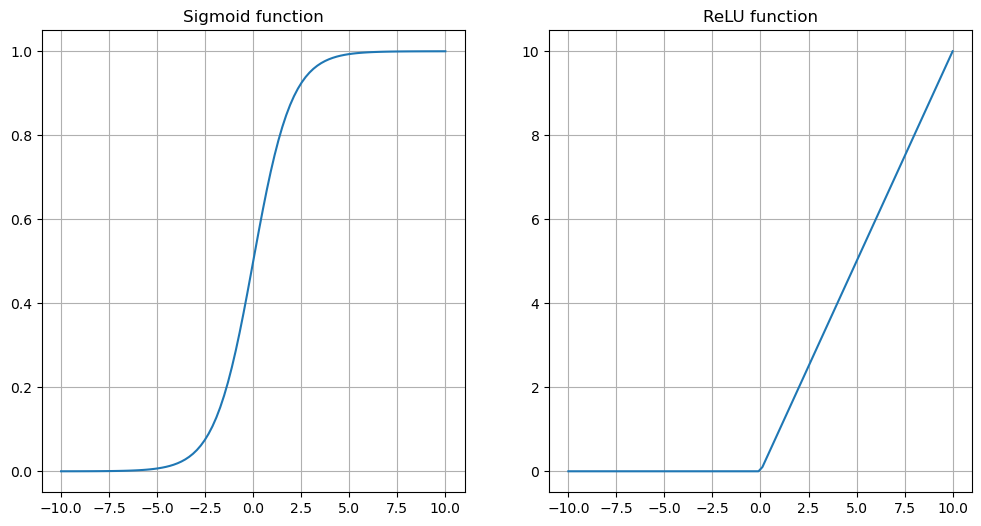

In [67]:
### 예제: Sigmoid와 ReLU 비교
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)

# Sigmoid function
sigmoid = 1 / (1 + np.exp(-x))

# ReLU function
relu = np.maximum(0, x)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x, sigmoid)
plt.title('Sigmoid function')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x, relu)
plt.title('ReLU function')
plt.grid(True)

plt.show()


### 결론
Sigmoid 함수의 출력이 0.5를 중심으로 하는 것은 역전파 과정에서 가중치 업데이트의 비효율성을 초래할 수 있습니다. 이는 특히 깊은 신경망에서 기울기 소실 문제와 신호 전달 문제를 유발할 수 있습니다. 반면에 ReLU와 같은 대체 활성화 함수는 0을 중심으로 하여 이러한 문제를 줄이고 가중치 업데이트의 효율성을 높여줍니다. 이는 더 빠르고 효과적인 학습을 가능하게 하고, 깊은 신경망에서 높은 성능을 발휘할 수 있게 합니다.

### 데이터 중심이 0.5의 문제를 이해하기 위한 예제

### 뉴런 관점에서 바라보기
신경망의 각 뉴런은 입력을 받아 가중치를 곱하고, 바이어스를 더하여 활성화 함수에 passed 됩니다. 그 결과가 다음 층으로 전달됩니다. 만약 Sigmoid 활성화 함수를 사용하는 경우를 봅시다.

**Sigmoid 활성화 함수**: 수식은 다음과 같습니다.
$\[ \sigma(x) = \frac{1}{1 + e^{-x}} \]$

즉, 출력 값의 범위는 항상 (0, 1) 사이가 됩니다.    

### 1. 양수와 음수 출력으로 인한 가중치 갱신 차이
활성화 함수의 출력 값이 0을 중심으로 있는 경우와 0.5를 중심으로 있는 경우의 차이점은 다음과 같습니다.

#### 예제:
- **Sigmoid의 경우**:
  - 가중치 갱신이 한 방향으로 치우치는 문제가 있습니다. 이는 입력이 음수이거나 양수일 때 초래됩니다.
  - 예를 들어, 입력 신호가 양수일 때 Sigmoid 함수의 출력은 0.5보다 큰 값입니다.
  - 모든 은닉층의 뉴런이 0.5를 중심으로 하는 비대칭적 출력 값을 갖게 되면, 가중치 업데이트의 방향이 특정 방향으로 계속 반복될 수 있습니다.

#### 문제:
이 경우, 모든 뉴런이 평균적으로 0.5의 활성화 값을 가지게 되며, 이는 그렇지 않은 시스템에 비해 학습이 비효율적이 됩니다.

- **ReLU의 경우**:
  - ReLU 함수의 출력 값은 음수일 때는 0, 양수일 때는 입력 값 자체입니다.
  - 이렇게 되면, 입력 값에 0을 중심으로 대칭적인 양수와 음수가 나오기 때문에 가중치 업데이트가 균형 잡힙니다.

### 2. 비효율적인 정보 전달
Sigmoid 함수는 모든 출력 값을 0과 1 사이로 압축합니다. 이는 결국 정보 손실을 초래할 수 있습니다. 특히, 다층 신경망 (deep network)에서는 다음과 같은 문제가 있습니다.
- 활성화 함수가 모든 신호를 0.5를 중심으로 압축한다면, 뉴런이 신호를 효율적으로 전달하지 못하고 대부분의 출력을 비슷한 값으로 집중하게 됩니다.
- 이렇게 되면, 네트워크의 정보 표현력이 제한됩니다.

### 직관적인 설명 추가
쉽게 말해, 만약 모델이 정답 값을 맞추기 위해 계속해서 조정해야 하는데, 이러한 출력 값들이 계속 0.5 근처에 있다면 이를 통해 원하는 방향으로 조정하기 어렵습니다. 
- 이는 마치 매번 가야 할 방향의 중심 값을 기준으로 생각하는 것이 아니라 중간 값을 기준으로 생각한다고 하면, 매우 비효율적인 운동 방법과 비슷합니다.

### 시각적 예로 이해하기
#### Sigmoid와 ReLU의 가중치 업데이트 비교

다음은 간단한 Python 코드로 시각적 예시를 보여줍니다.



/opt/homebrew/Caskroom/miniforge/base/envs/DL-tf/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/DL-tf/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/DL-tf/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 54632 (\N{HANGUL SYLLABLE HAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/DL-tf/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/Caskroom/miniforge/base/envs/DL-tf/lib/python3.8/site-packages/IPytho

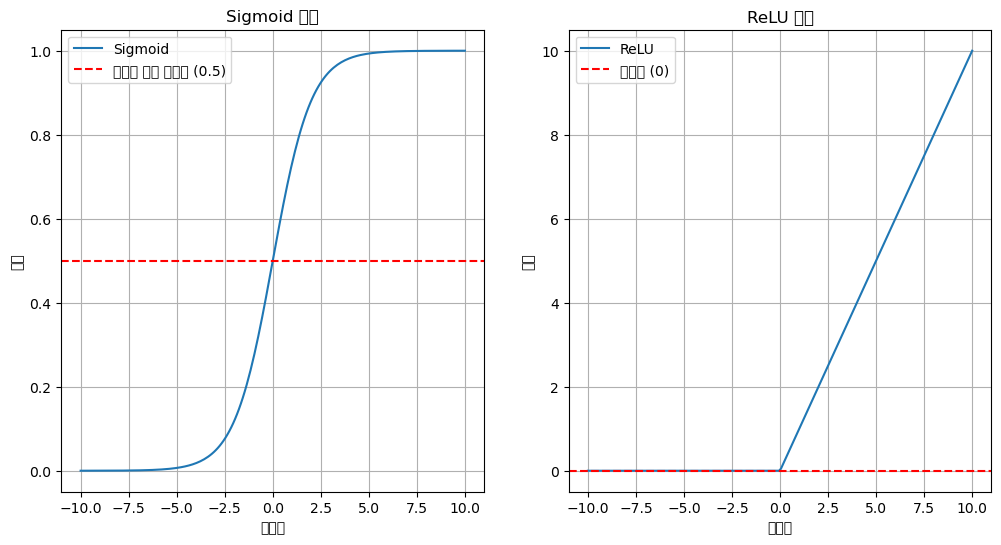

In [68]:
import numpy as np
import matplotlib.pyplot as plt

# 가중치 값(-10에서 10까지)
weights = np.linspace(-10, 10, 200)

# Sigmoid 함수와 ReLU 함수 적용
sigmoid_output = 1 / (1 + np.exp(-weights))
relu_output = np.maximum(0, weights)

plt.figure(figsize=(12, 6))

# Sigmoid 함수 출력
plt.subplot(1, 2, 1)
plt.plot(weights, sigmoid_output, label="Sigmoid")
plt.axhline(y=0.5, color='r', linestyle='--', label="원점이 아닌 중심점 (0.5)")
plt.xlabel("가중치")
plt.ylabel("출력")
plt.title("Sigmoid 함수")
plt.legend()
plt.grid(True)

# ReLU 함수 출력
plt.subplot(1, 2, 2)
plt.plot(weights, relu_output, label="ReLU")
plt.axhline(y=0, color='r', linestyle='--', label="중심점 (0)")
plt.xlabel("가중치")
plt.ylabel("출력")
plt.title("ReLU 함수")
plt.legend()
plt.grid(True)

plt.show()

### 요약
- Sigmoid 함수의 출력이 0.5를 중심으로 하게 되면, 가중치 업데이트가 비효율적이 되고 특정 방향으로 치우칠 수 있습니다.
- 이러한 가중치 업데이트의 비대칭성은 학습 속도를 떨어뜨리고, 최종적으로 신경망이 좋은 성능을 낼 수 없게 만듭니다.
- 반면, ReLU 함수의 출력은 비교적 간단하면서도 대칭적입니다 (0을 중심으로). 이는 가중치 업데이트 과정에서 더 균형잡힌 학습을 가능하게 만듭니다.

이제 Sigmoid 함수의 0.5 중심 문제와 비효율적인 가중치 업데이트의 문제점을 더 명확히 이해하실 수 있을 겁니다.

In [72]:
#- 파이썬의 list comprehension 기능과 all() 함수를 활용해 비교
features = ['귀엽다', '착하다', '똑똑하다', '빠르다']
rabbit = ['귀엽다', '착하다', '빠르다'] # rabbit = ['귀엽다', '사납다', '빠르다']
# 다음 두 줄의 코드는 파이썬의 list comprehension 기능과 all() 함수 테스트용 코드임
# comp_list = [elem in features for elem in rabbit]
# print(comp_list)
#3=: [True, True, True]
# all(comp_list)
# 모두 True 이므로 all() 함수의 결과도 역시 True
if all(elem in features for elem in rabbit):
    print("모두 포함하고 있습니다.")
# list comprehension
else:
    print("모두 포함하고 있지는 않습니다.")

모두 포함하고 있습니다.


In [74]:
print('모두 포함하고 있습니다.' if all(elem in features for elem in rabbit) else "모두 포함하고 있지는 않습니다.")

모두 포함하고 있습니다.
